# PCA Analysis

## 1. Import Essential Packages

In [1]:
# Import essential packages
import warnings
warnings.filterwarnings("ignore")
import os
import missingno
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn helper modules
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Plotting settings
# In case the font Cambria is not locally installed in you system, 
# comment out the line below
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 10,6

# Set seed for reproducilibity
np.random.seed(0)

# Define paths that are necessary
DPATH = "../data/"
RPATH = "../results/"
IPATH = "../images/"

if "data" not in os.listdir("../"):
    os.mkdir(DPATH)
if "images" not in os.listdir("../"):
    os.mkdir(IPATH)
if "results" not in os.listdir("../"):
    os.mkdir(RPATH)

In [2]:
df = pd.read_csv(DPATH+"cleaned_data.csv", index_col=0)
X = df[df.columns[2:]].values
df

strain_slug  region   tot_thc   tot_cbd   tot_cbg   tot_cbc  tot_cbn  \
u_id                                                                           
0          Sample_0       0  0.934875  0.002195  0.051035  0.000000      0.0   
1          Sample_1       0  0.942376  0.004544  0.047952  0.002478      0.0   
2          Sample_2       0  0.942578  0.004096  0.047829  0.002907      0.0   
3          Sample_3       0  0.966836  0.003003  0.025930  0.001726      0.0   
4          Sample_4       0  0.934829  0.003692  0.049598  0.000000      0.0   
...             ...     ...       ...       ...       ...       ...      ...   
88943  Sample_88943       1  0.938651  0.002171  0.059177  0.000000      0.0   
88944  Sample_88944       1  0.950399  0.002075  0.047527  0.000000      0.0   
88980     gods-gift       1  0.969916  0.002917  0.026502  0.000665      0.0   
88998      ghost-og       1  0.970867  0.002627  0.026506  0.000000      0.0   
88999     butter-og       1  0.968337  0.002012  0.029651  0.000000      0.0   

       tot_thcv  tot_ocimene  camphene  ...  humulene  caryophyllene  \
u_id                                    ...                            
0      0.011895     0.126627  0.005041  ...  0.109391       0.282619   
1      0.002651     0.215732  0.005758  ...  0.082561       0.181566   
2      0.002590     0.208189  0.006220  ...  0.087307       0.190361   
3      0.002504     0.008019  0.008019  ...  0.134423       0.308981   
4      0.011880     0.129744  0.008177  ...  0.104336       0.259848   
...         ...          ...       ...  ...       ...            ...   
88943  0.000000     0.000000  0.002157  ...  0.092752       0.290768   
88944  0.000000     0.000000  0.006301  ...  0.069307       0.221872   
88980  0.000000     0.059835  0.002063  ...  0.091472       0.191197   
88998  0.000000     0.000617  0.005247  ...  0.047840       0.153395   
88999  0.000000     0.000464  0.007885  ...  0.051948       0.166048   

       limonene  linalool   myrcene  bisabolol  b_pinene  a_terpinene  \
u_id                                                                    
0      0.080244  0.016521  0.089255   0.014919  0.057590     0.005041   
1      0.073240  0.005758  0.115024   0.005758  0.040225     0.007331   
2      0.069086  0.013722  0.110446   0.006220  0.036003     0.007452   
3      0.108156  0.044945  0.295542   0.039173  0.028637     0.000000   
4      0.094910  0.023999  0.081292   0.008177  0.068392     0.008177   
...         ...       ...       ...        ...       ...          ...   
88943  0.195427  0.060828  0.251079   0.029767  0.029336     0.000000   
88944  0.257426  0.109811  0.207921   0.029253  0.044104     0.000000   
88980  0.046080  0.020633  0.366575   0.038514  0.045392     0.000000   
88998  0.204321  0.042901  0.468210   0.012654  0.037346     0.000000   
88999  0.247681  0.070965  0.332560   0.020408  0.057514     0.000000   

       terpinolene  a_pinene  
u_id                          
0         0.161961  0.038028  
1         0.210494  0.035078  
2         0.209503  0.030722  
3         0.000000  0.016085  
4         0.147166  0.046147  
...            ...       ...  
88943     0.000000  0.017256  
88944     0.008101  0.025653  
88980     0.000000  0.097662  
88998     0.002160  0.019444  
88999     0.006957  0.030612  

[26033 rows x 22 columns]

In [3]:
# Pipeline and PCA
model = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
model.fit(X)
X_transformed = model.transform(X)

In [4]:
X_transformed.shape

(26033, 20)

90% Variance is explained by: 13 PCs


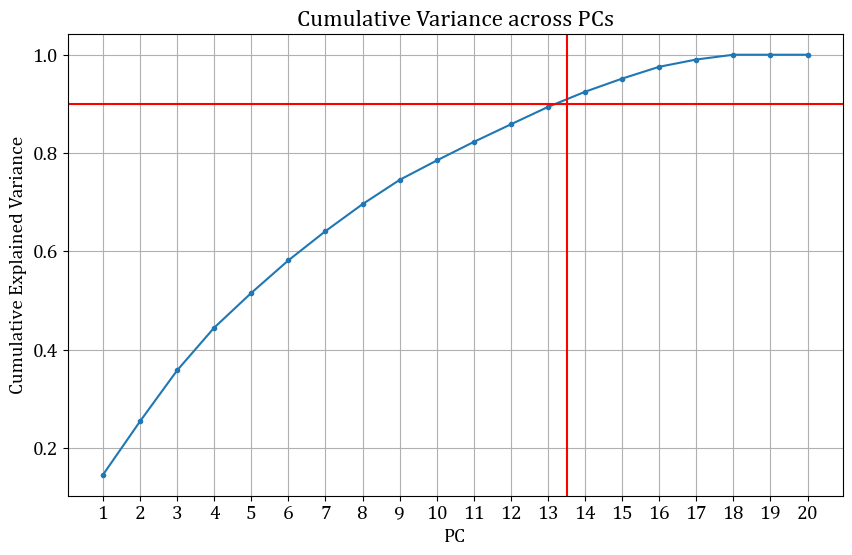

In [5]:
exp_var = model["pca"].explained_variance_ratio_
plt.plot(range(1, len(exp_var)+1), np.cumsum(exp_var), ".-", label="Cumulative Explained variance")

plt.axhline(0.9, color="r", linestyle="-")

position_x = np.where(np.cumsum(exp_var) > 0.9)[0][0]
print("90% Variance is explained by:", position_x, "PCs")
plt.axvline(position_x+0.5, color="r", linestyle="-")

plt.xticks(range(1, len(exp_var)+1))
plt.xlabel("PC")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance across PCs")
plt.show()

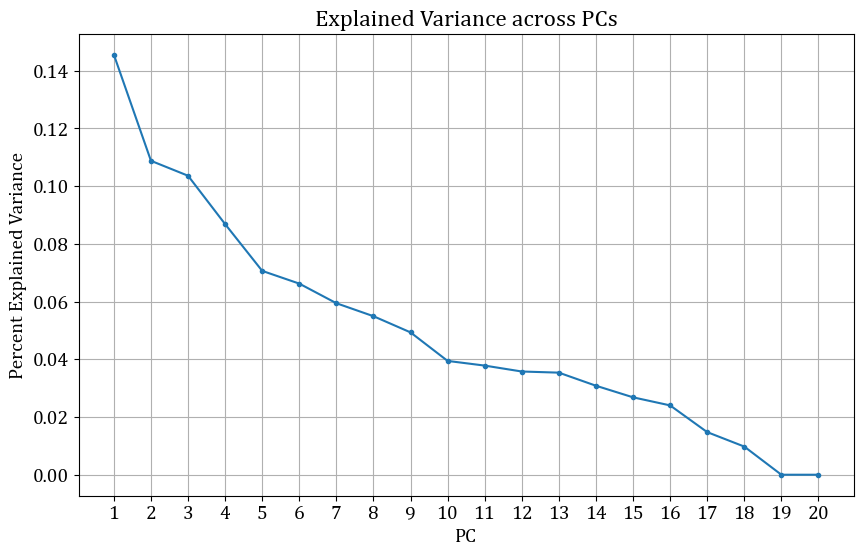

In [6]:
plt.plot(range(1, len(exp_var)+1), exp_var, ".-", label="Explained variance")
plt.xticks(range(1, len(exp_var)+1))
plt.xlabel("PC")
plt.ylabel("Percent Explained Variance")
plt.title("Explained Variance across PCs")
plt.show()

More than 90% variance is explained by the top 13 PCs

## Plots

In [7]:
df_pca = pd.DataFrame(X_transformed)
df_pca

0         1         2         3         4         5         6   \
0      0.062433 -0.460243 -0.603420  2.216522 -0.224708 -0.755822  0.337966   
1      1.031236 -0.540904  0.058997  2.833693 -0.737586 -0.729527 -0.269746   
2      0.826590 -0.463258  0.082797  2.833259 -0.738011 -0.641144 -0.292399   
3     -1.583976  0.310109 -0.703823  0.157794 -0.957399  0.167425  0.416202   
4      0.289402 -0.635416 -0.417411  1.996998  0.070891 -0.830122  0.295792   
...         ...       ...       ...       ...       ...       ...       ...   
26028 -1.317899  0.027873 -0.795239  0.093036 -0.522831 -0.033533 -0.403551   
26029 -1.036260 -0.423486 -0.429534 -0.478657  0.267562 -0.103609 -0.895162   
26030  0.226770  0.029068 -0.455632 -0.070319 -1.402272 -0.241137  0.881339   
26031  0.091599 -0.392028 -0.314843 -0.971147 -1.075744  0.646167 -0.844620   
26032 -0.169406 -0.635043 -0.380569 -0.952858 -0.106491  0.136023 -0.772845   

             7         8         9         10        11        12        13  \
0      0.607592  1.072438 -0.722425 -0.735478  0.301455  0.293308  0.297863   
1      1.021384  0.396900 -1.567681 -0.828087  0.640366 -0.262757  0.807264   
2      0.972194  0.369907 -1.523084 -0.878188  0.576673 -0.262465  0.841804   
3     -0.379162  0.349257  0.210728 -0.613906  0.636723  0.334018  0.098241   
4      0.601671  1.082564 -0.757326 -0.834403  0.226802  0.363847  0.318667   
...         ...       ...       ...       ...       ...       ...       ...   
26028  0.231298 -0.227151  0.317428  0.004089 -0.110385  0.545300 -0.310079   
26029  0.318889 -0.176502  0.389443  0.074672 -0.027180 -0.010257 -0.165904   
26030 -0.261266  0.040974 -0.124046 -0.286383  0.105127 -0.299452  0.310077   
26031 -0.191226 -0.033538  0.028048  0.348376  0.563091  0.346631 -0.252674   
26032 -0.050619 -0.061522  0.116649  0.317709  0.445868  0.108247 -0.189445   

             14        15        16        17            18            19  
0      0.011048 -0.128235  0.148907  0.201714 -2.228954e-15 -1.082268e-15  
1      0.458603  0.209910  0.232303 -0.222453 -1.022973e-14 -1.313102e-15  
2      0.418416  0.121402  0.232993 -0.258132 -9.695906e-15 -3.949867e-16  
3     -0.034086  0.048810  0.307076  0.023899  3.748103e-15 -6.195223e-16  
4      0.075491  0.028726  0.270407  0.293197 -4.053287e-15 -9.412306e-16  
...         ...       ...       ...       ...           ...           ...  
26028 -0.171283  0.086559 -0.206595  0.011612  3.052782e-15 -4.984487e-16  
26029 -0.126469 -0.036079 -0.088175 -0.010292 -9.738972e-16 -1.534147e-15  
26030  0.179927  0.280639  0.217813 -0.113776 -3.820562e-16 -1.916568e-15  
26031 -0.124417  0.192195  0.168154  0.076592  3.798244e-15 -1.143337e-15  
26032 -0.093052  0.101276  0.186354  0.211133  1.111138e-15 -1.142561e-15  

[26033 rows x 20 columns]

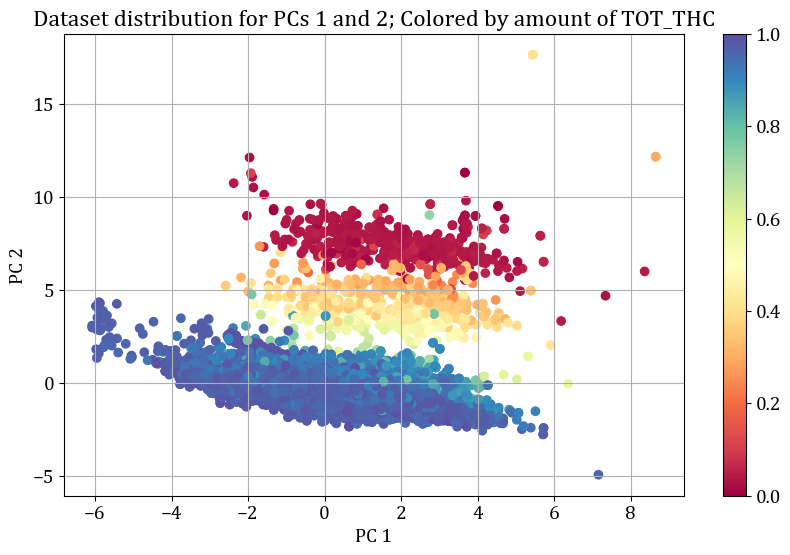

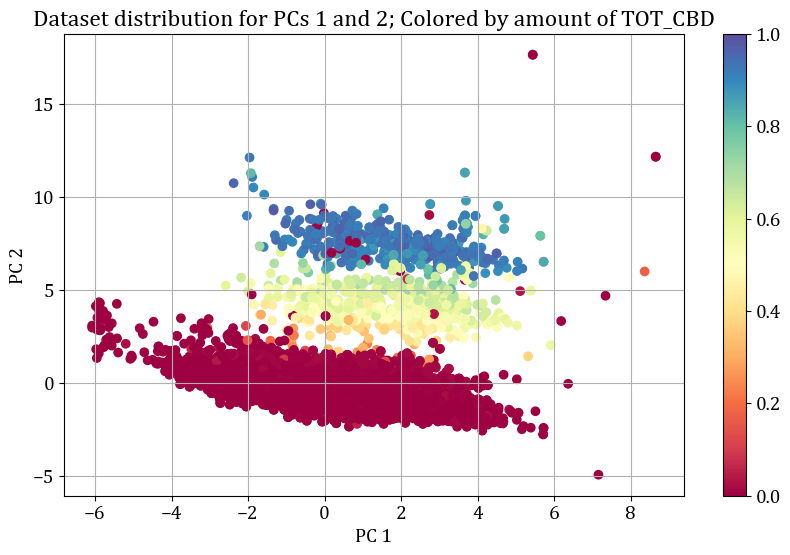

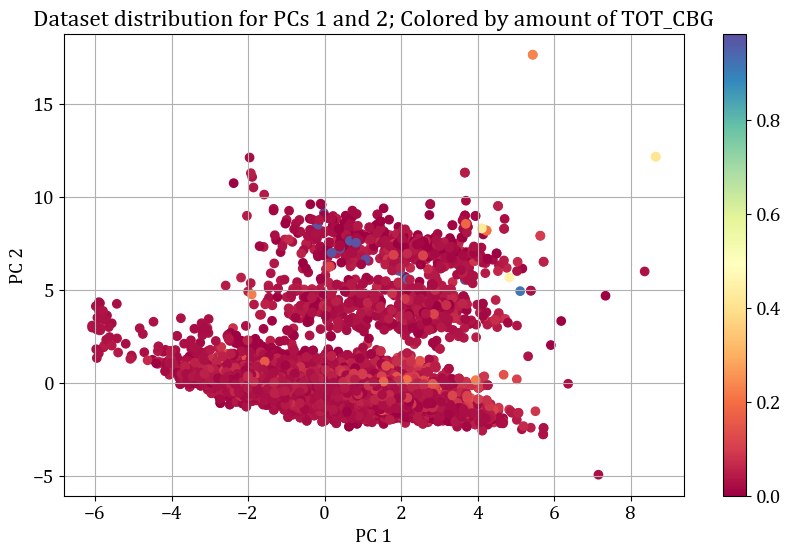

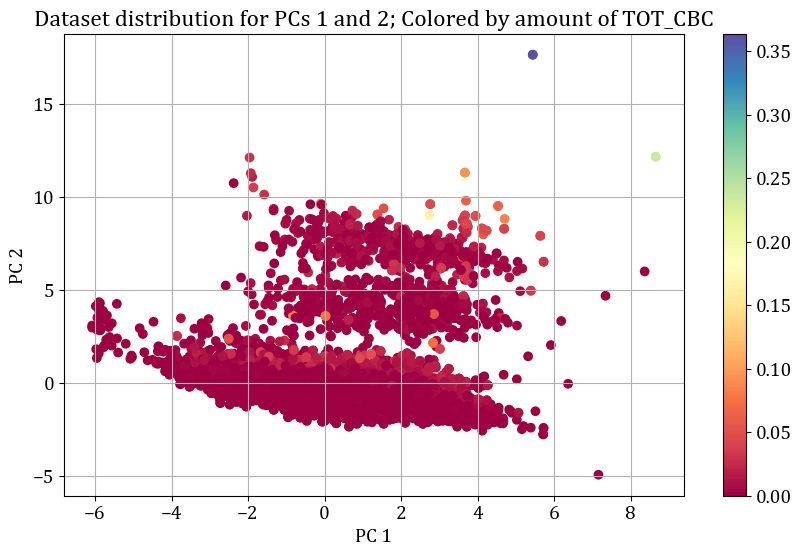

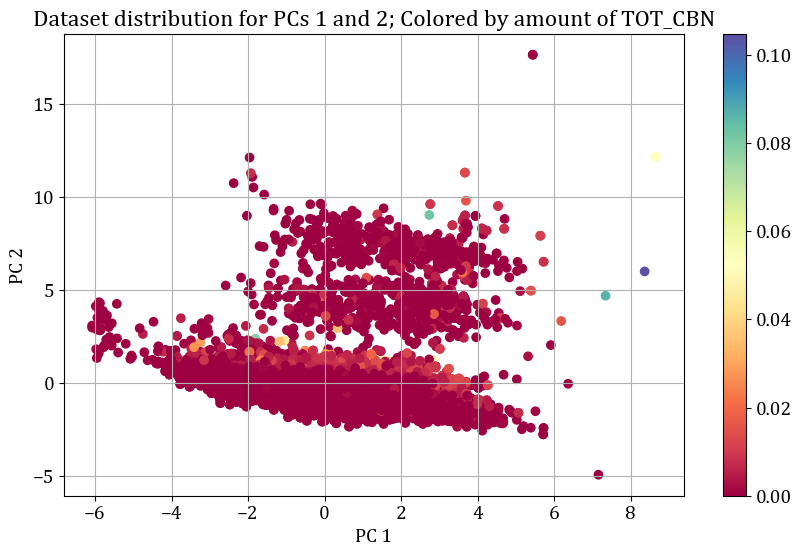

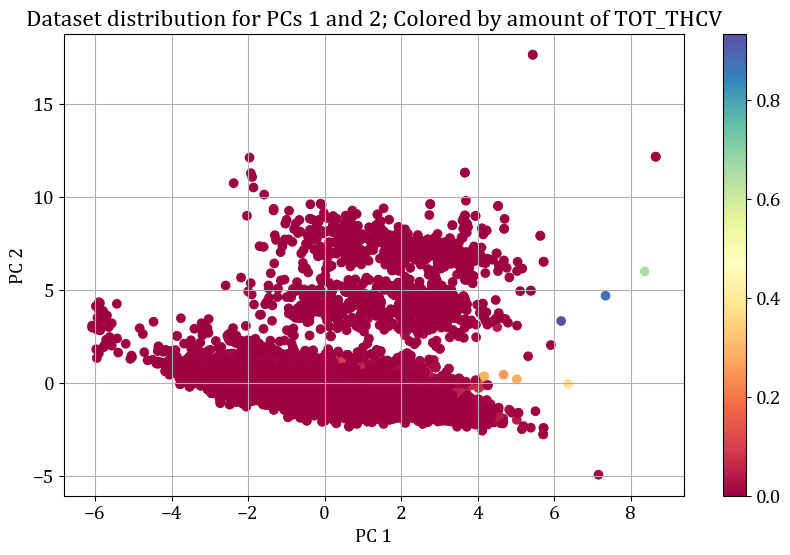

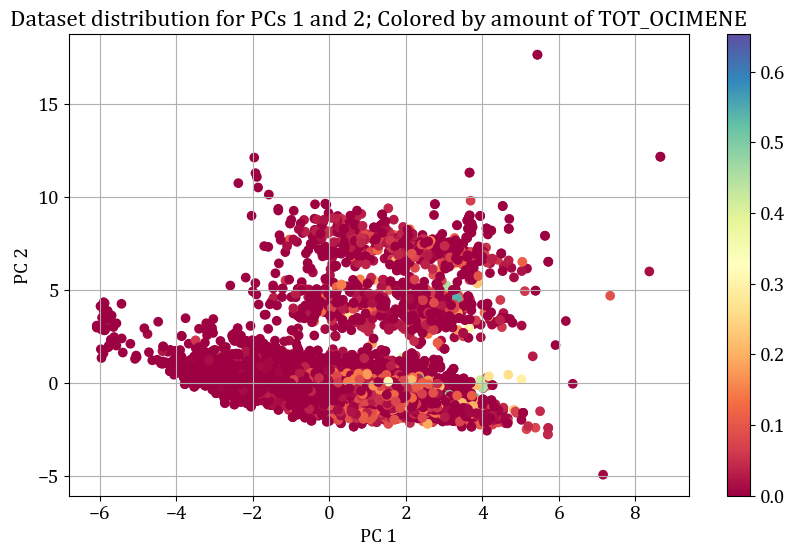

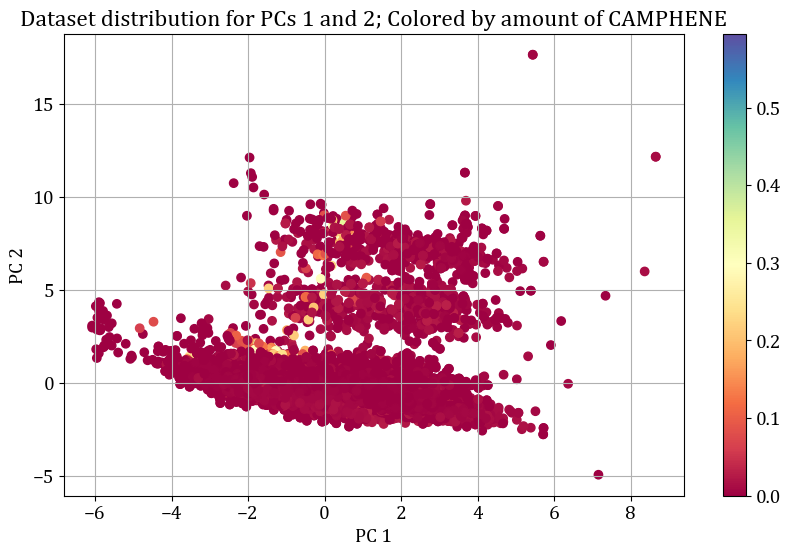

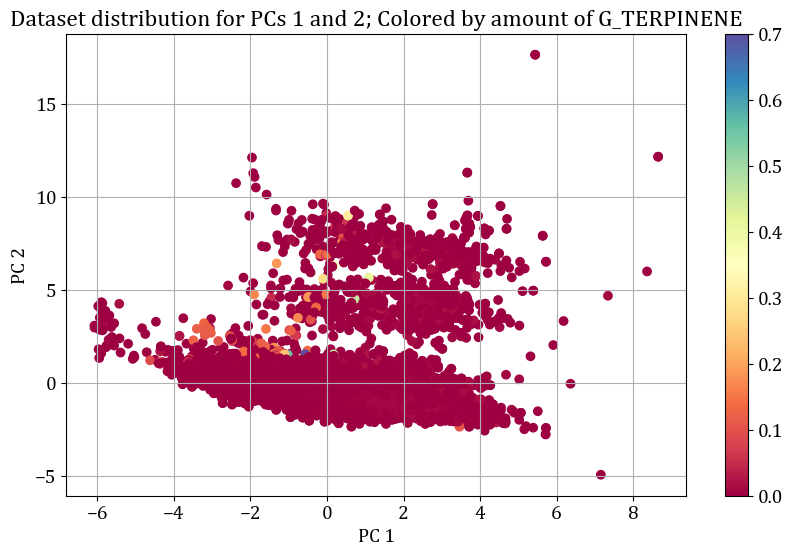

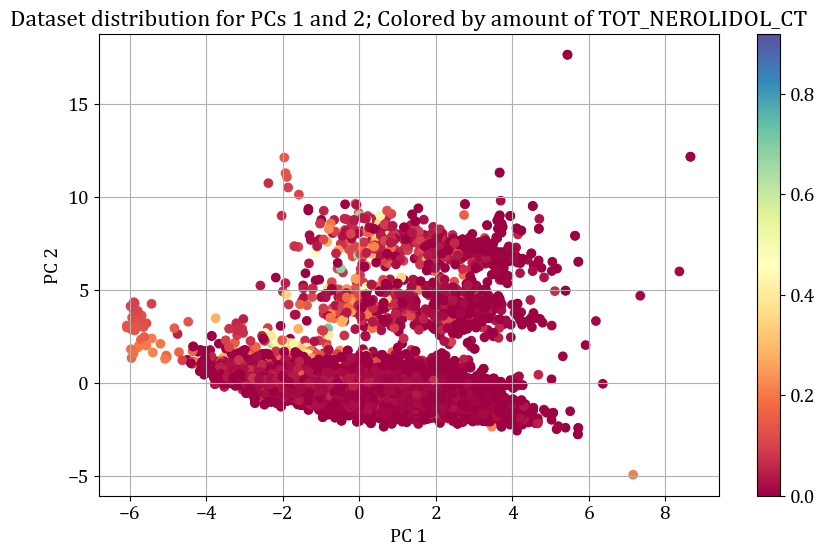

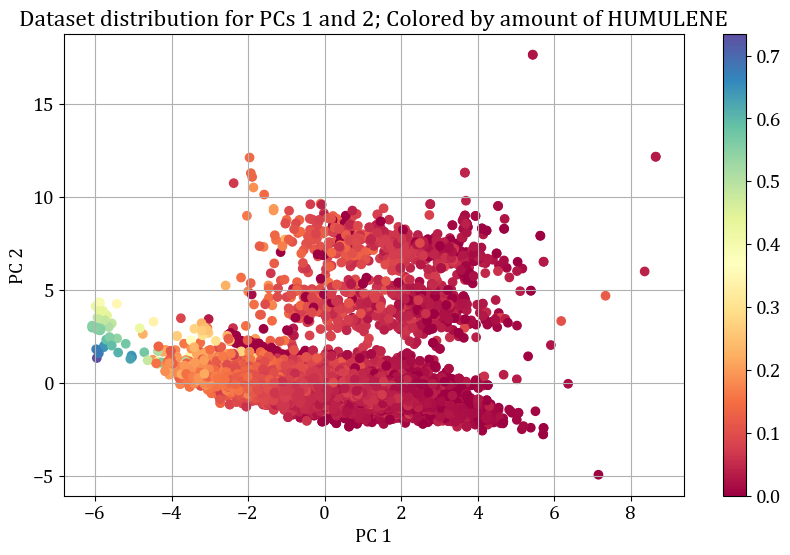

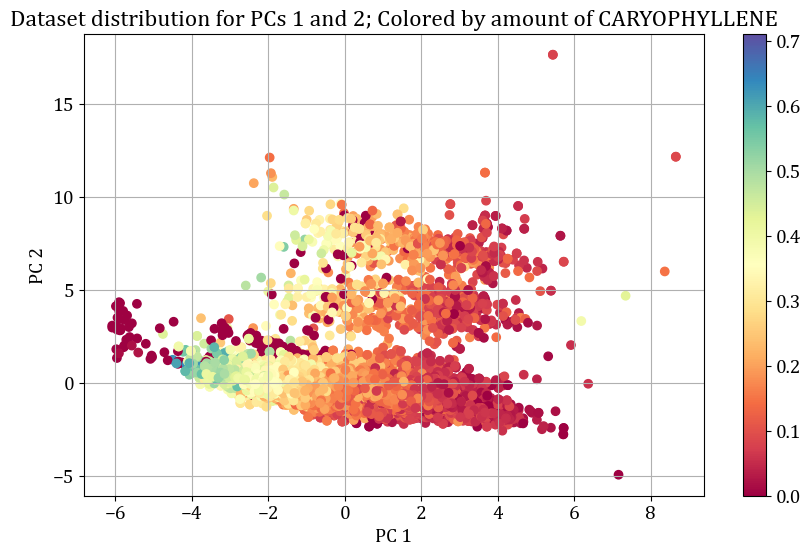

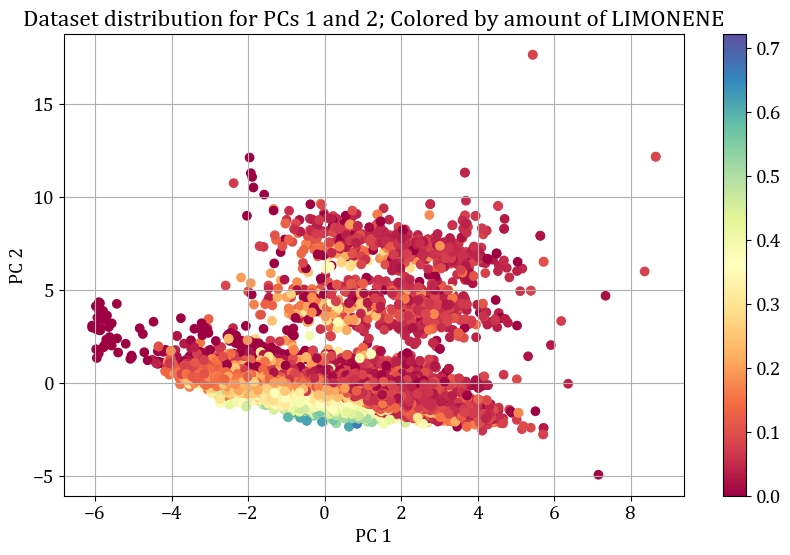

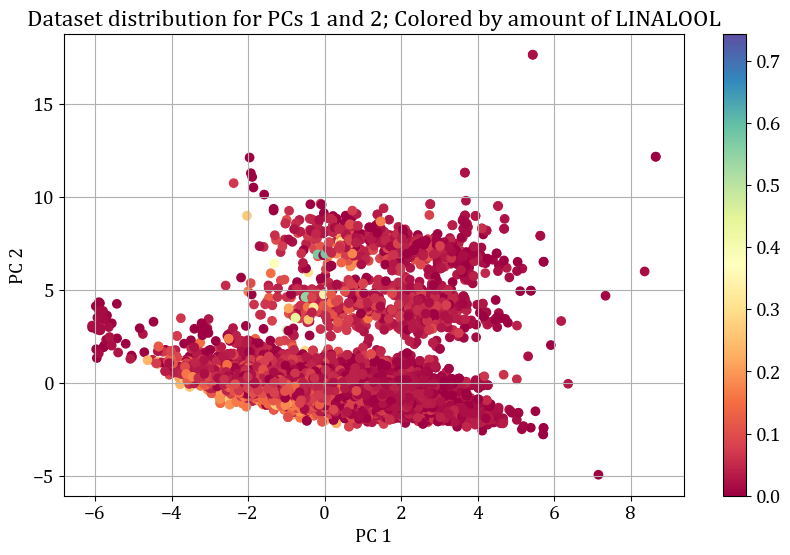

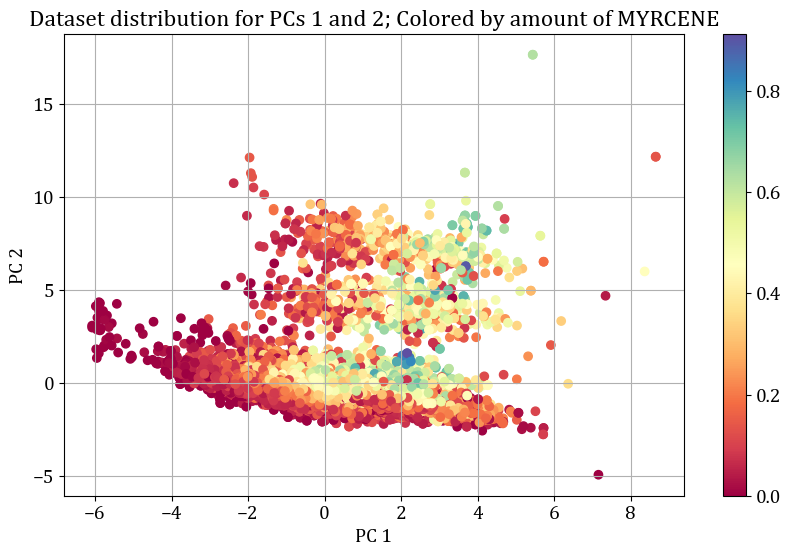

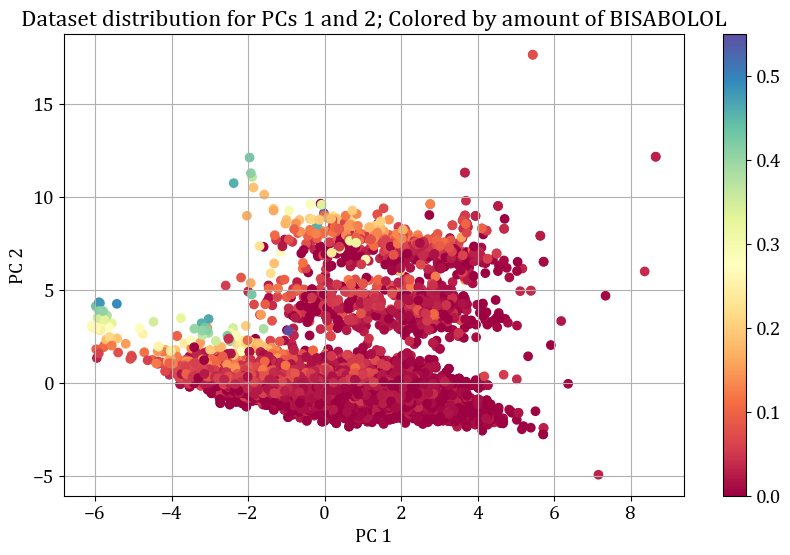

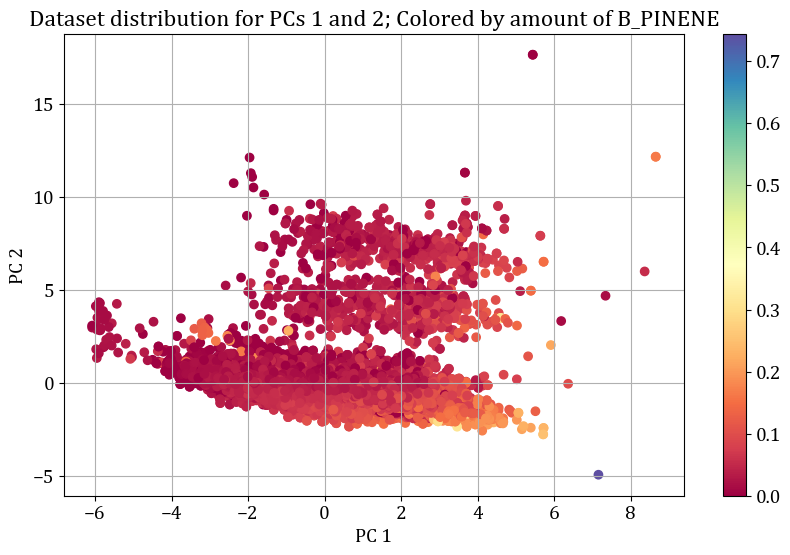

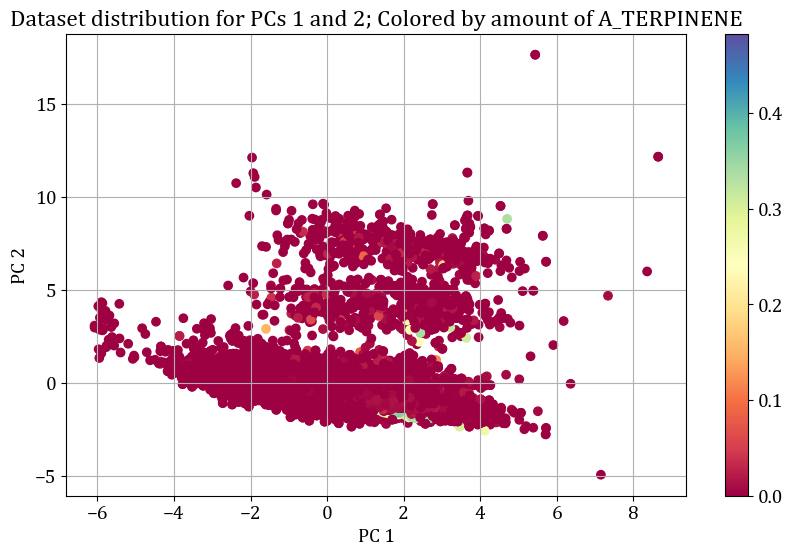

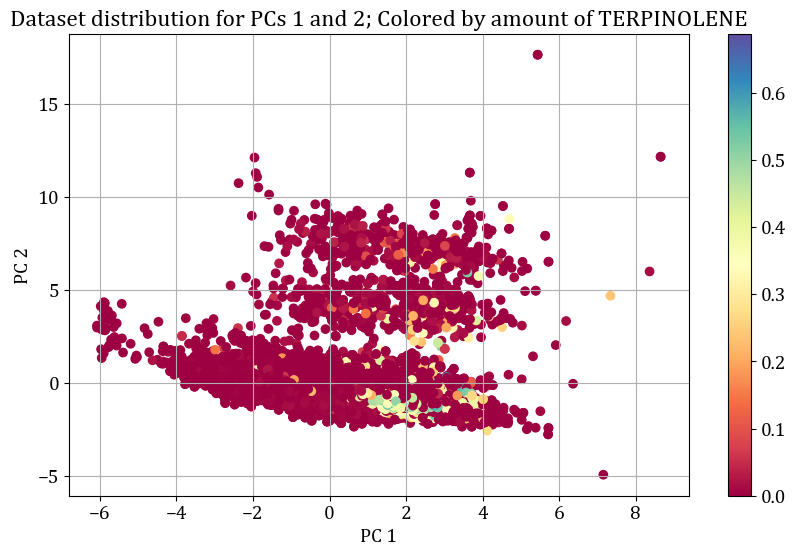

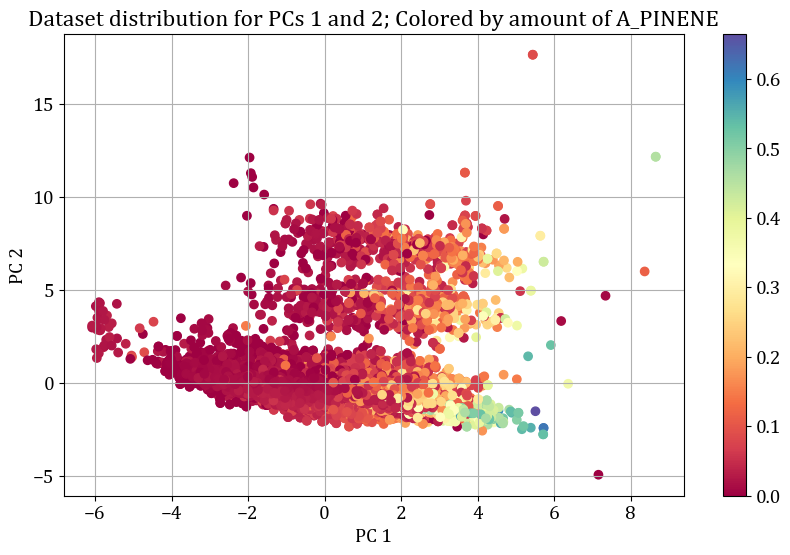

In [8]:
for i in df.columns[2:]:
    plt.scatter(df_pca[0], df_pca[1], c=df[i], cmap="Spectral")
    plt.colorbar()
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.title("Dataset distribution for PCs 1 and 2; Colored by amount of "+i.upper())
    plt.savefig(IPATH+"PC_1_2_"+i+".png")
    plt.show()

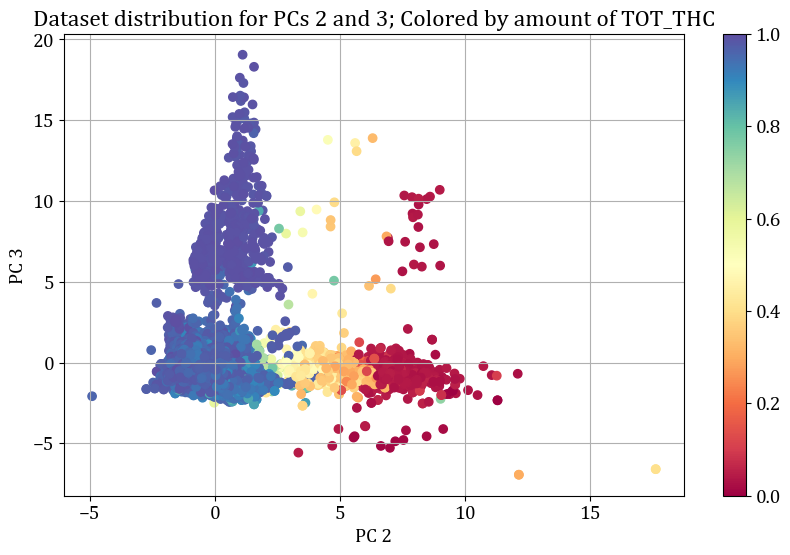

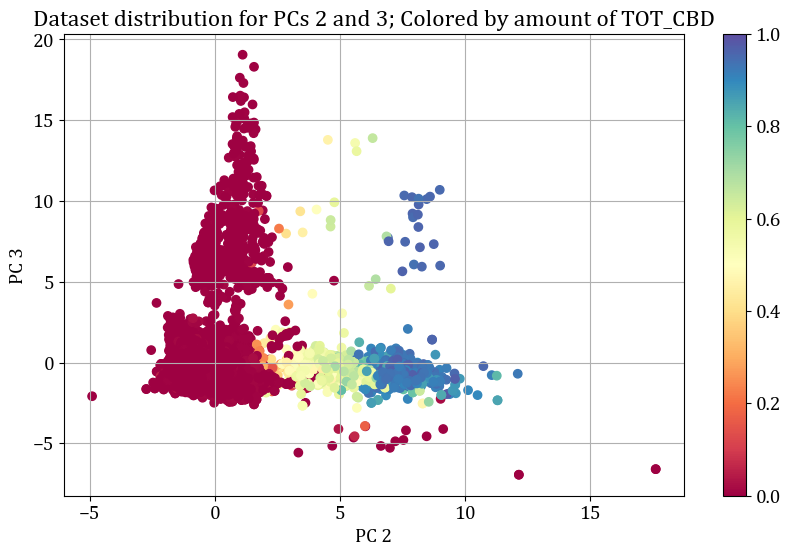

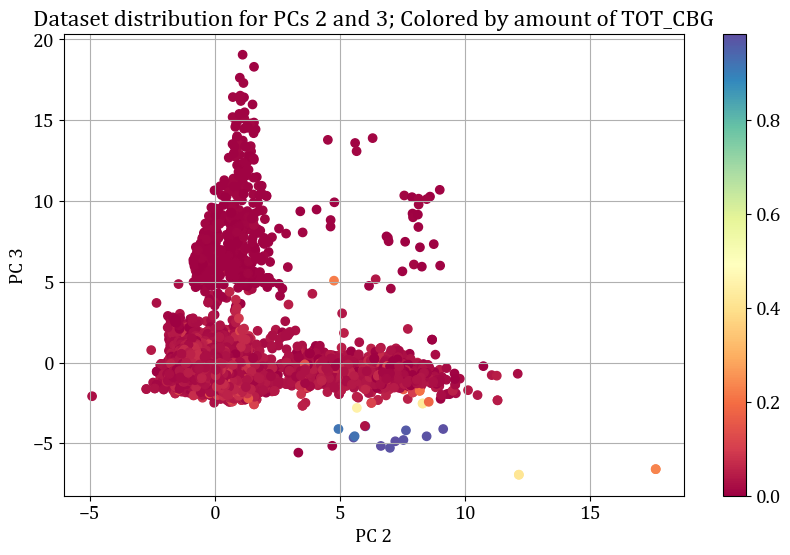

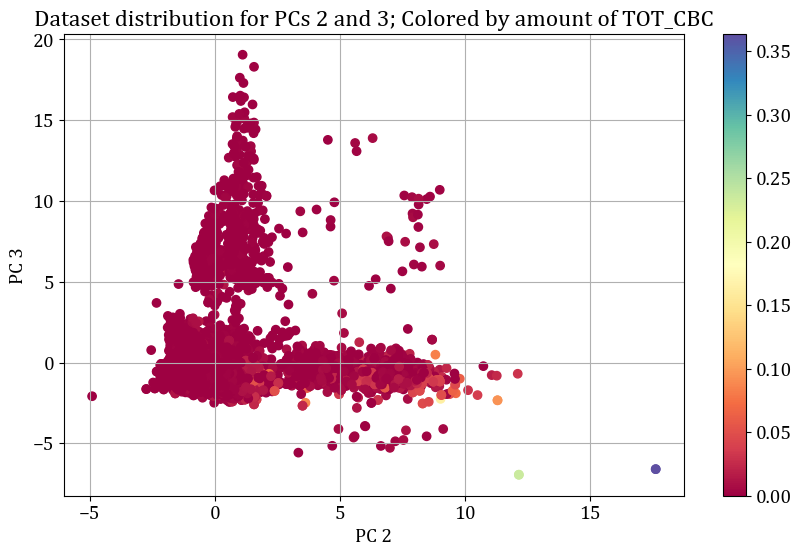

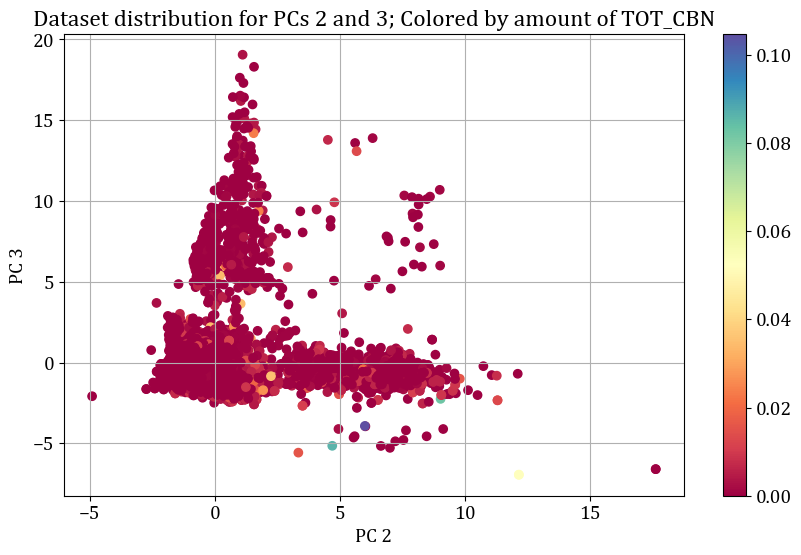

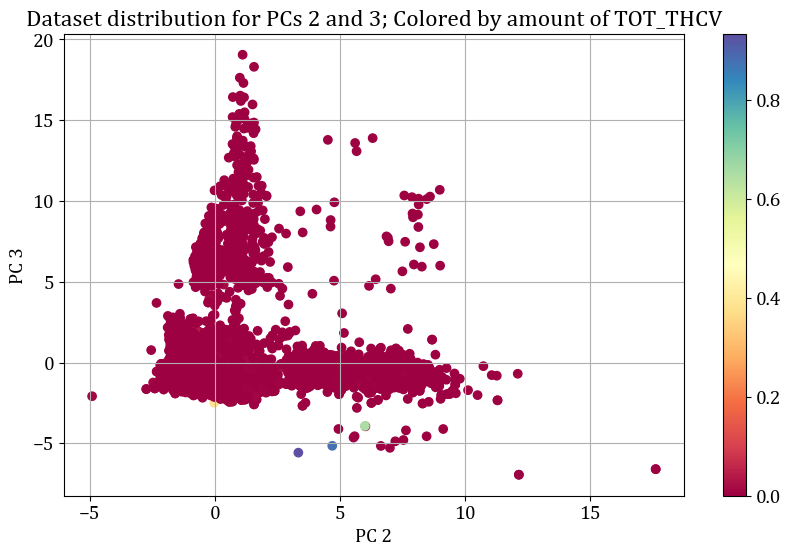

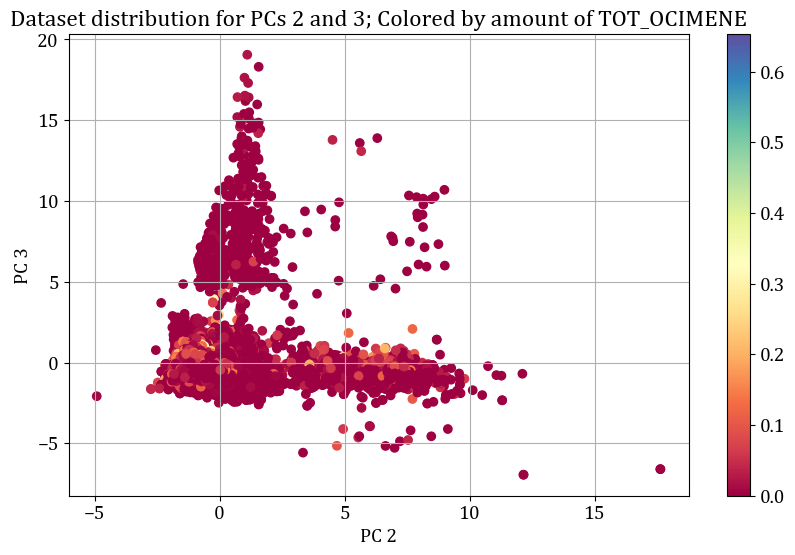

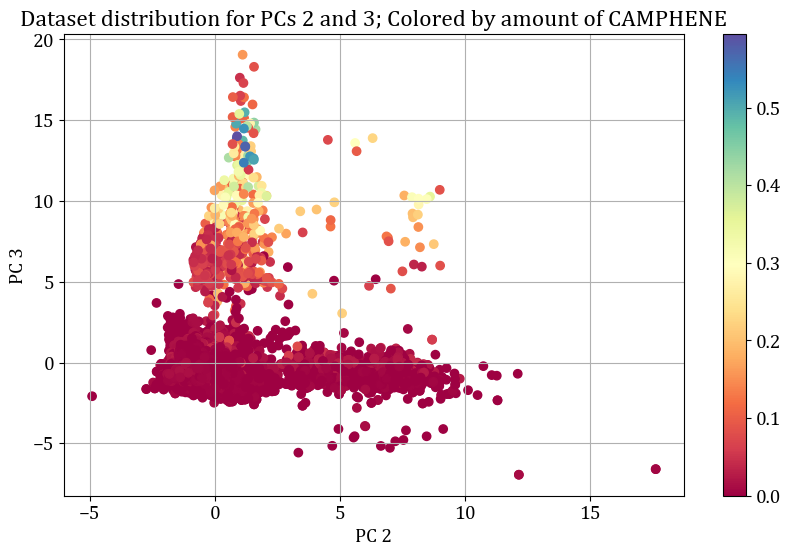

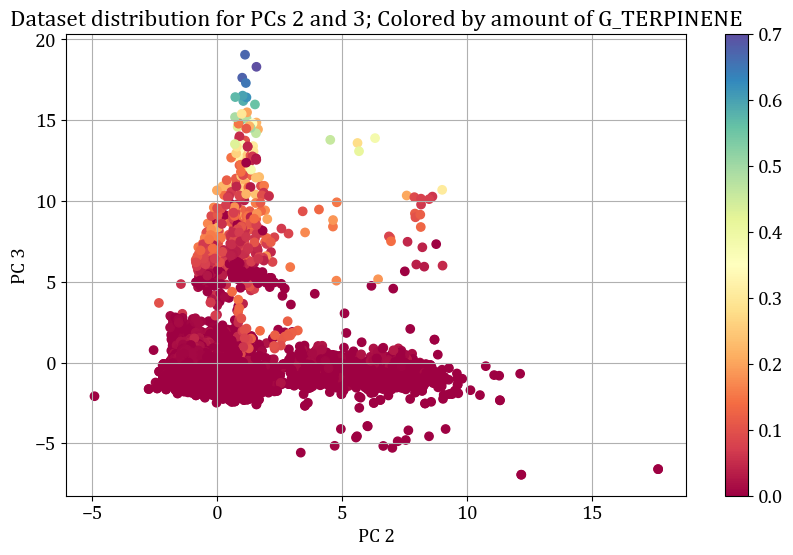

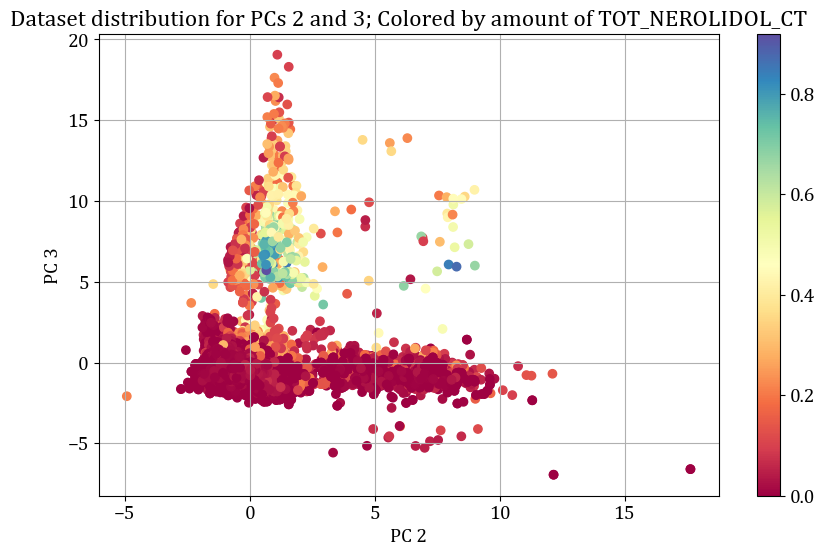

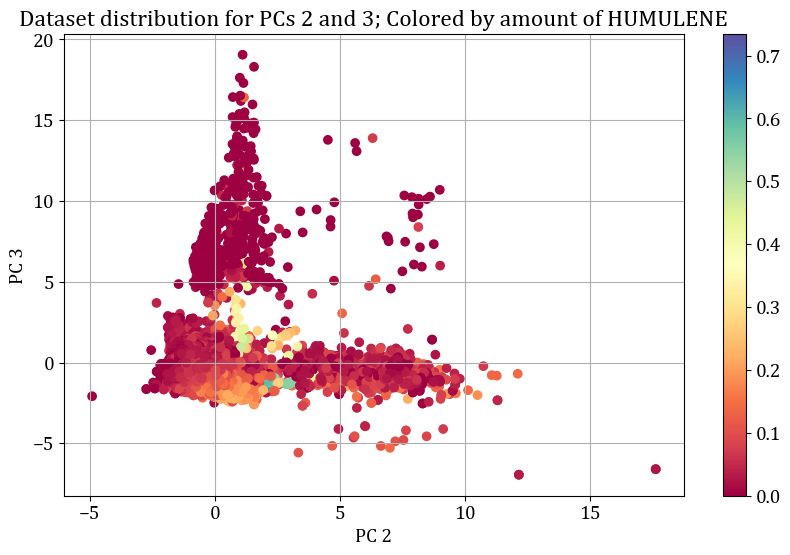

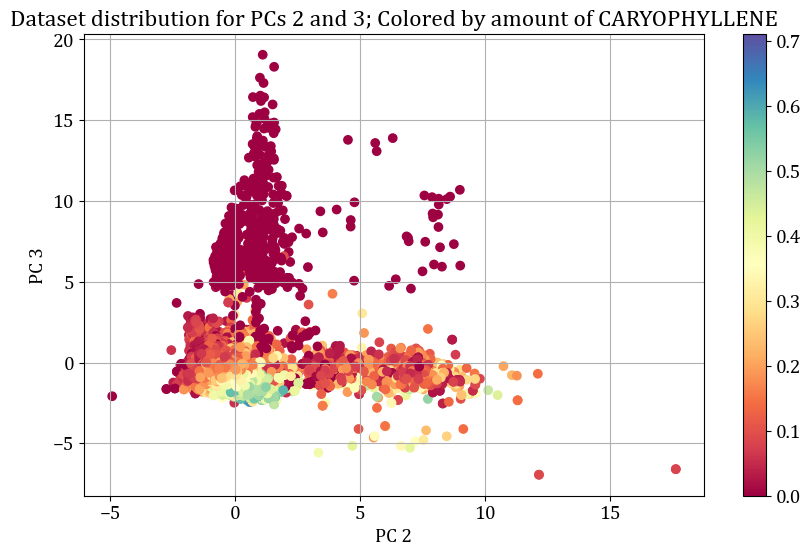

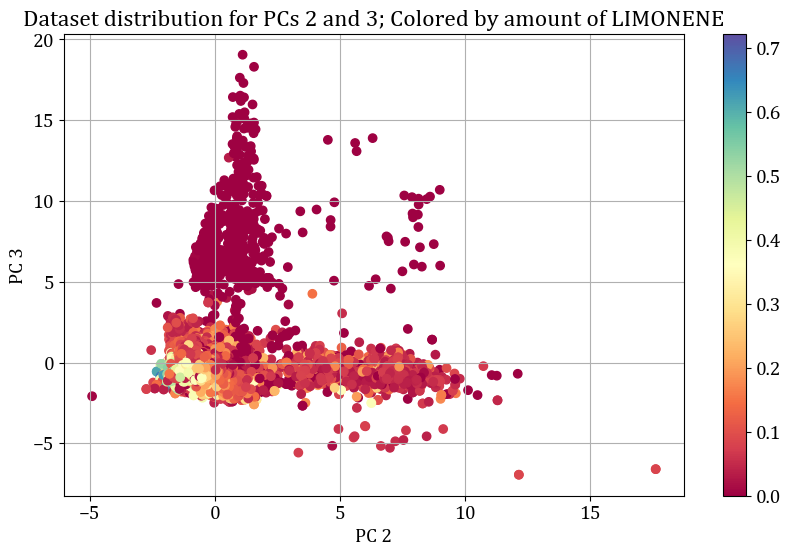

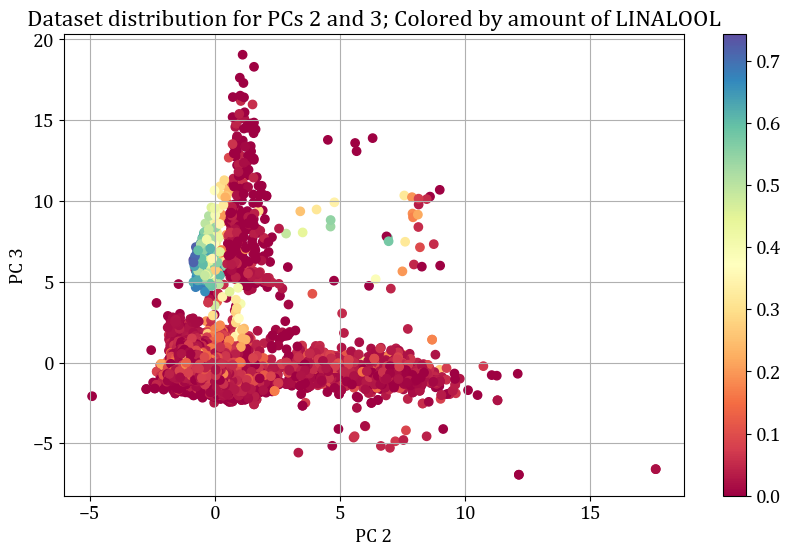

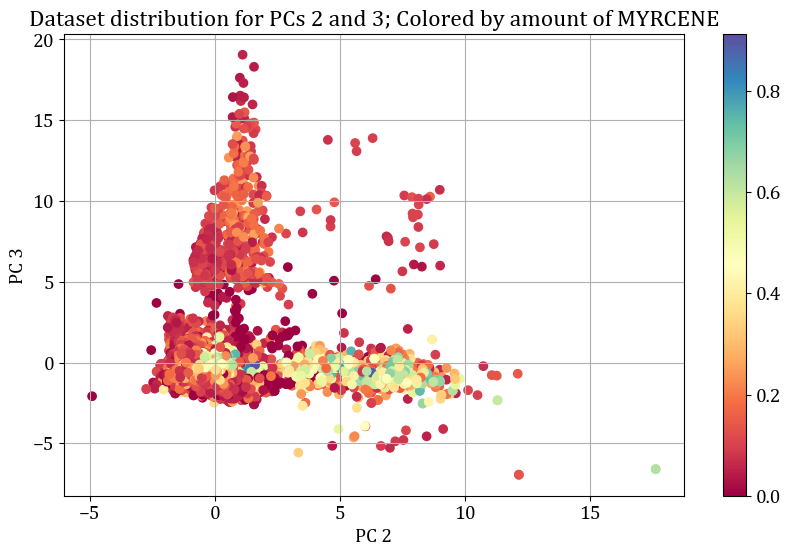

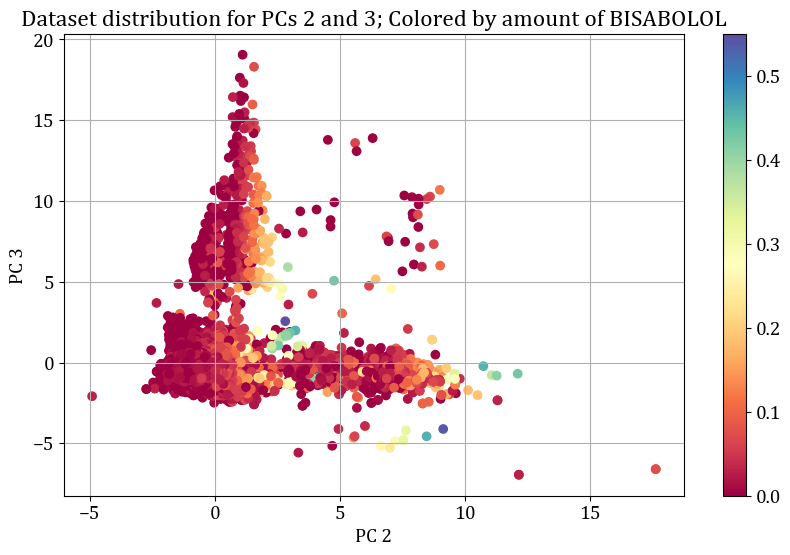

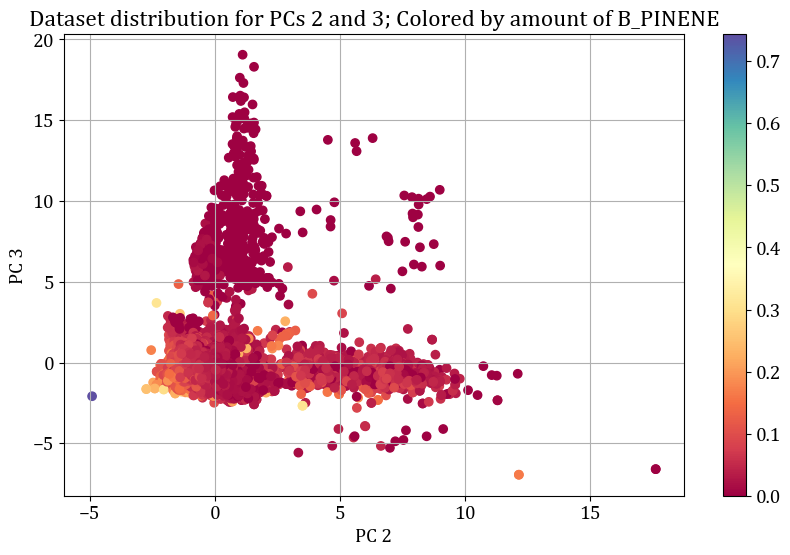

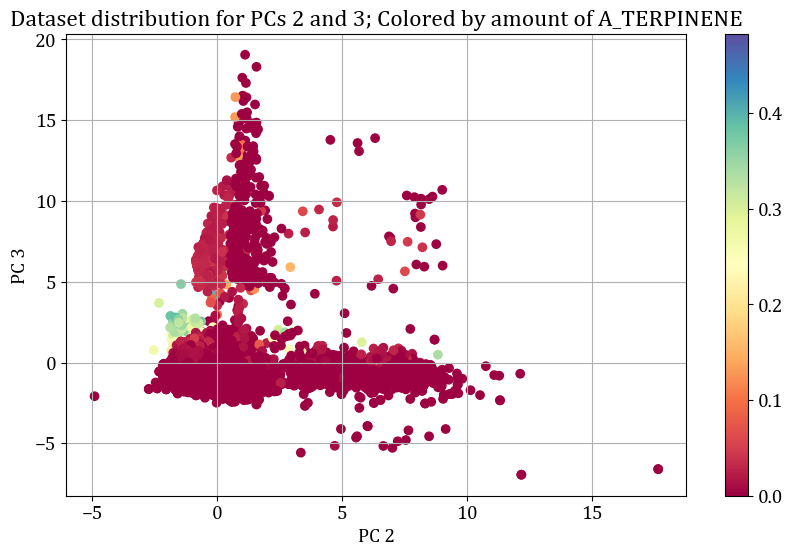

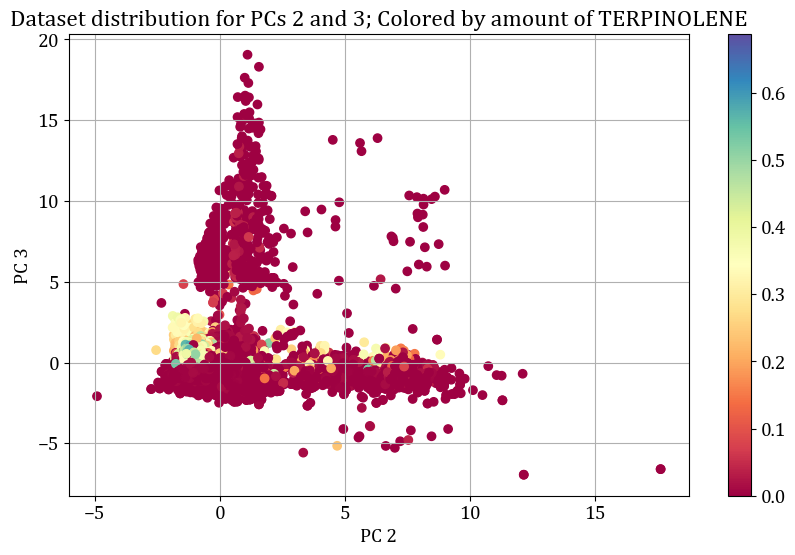

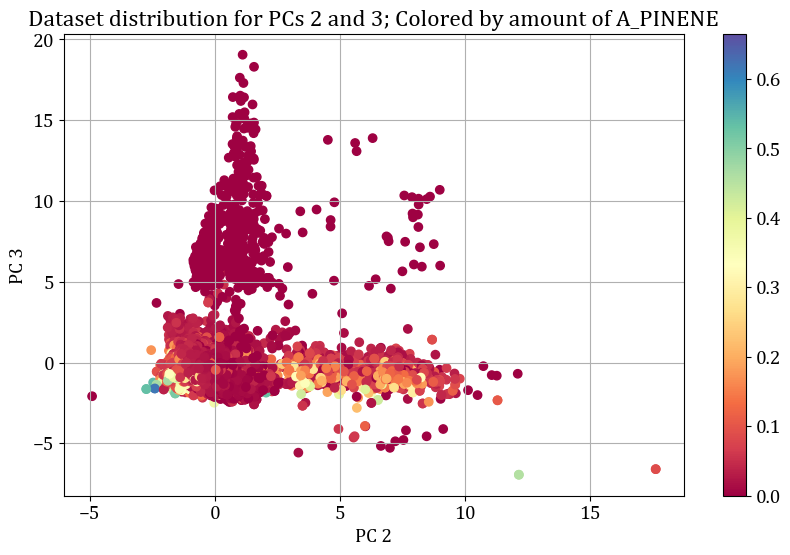

In [9]:
for i in df.columns[2:]:
    plt.scatter(df_pca[1], df_pca[2], c=df[i], cmap="Spectral")
    plt.colorbar()
    plt.xlabel("PC 2")
    plt.ylabel("PC 3")
    plt.title("Dataset distribution for PCs 2 and 3; Colored by amount of "+i.upper())
    plt.savefig(IPATH+"PC_2_3_"+i+".png")
    plt.show()

In [10]:
np.save(DPATH+"X_transformed", X_transformed)